In [1]:
!wget https://github.com/mlittmancs/great_courses_ml/raw/master/vocab2.txt
!wget https://github.com/mlittmancs/great_courses_ml/raw/master/cb.txt

--2020-05-11 10:22:41--  https://github.com/mlittmancs/great_courses_ml/raw/master/vocab2.txt
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/vocab2.txt [following]
--2020-05-11 10:22:41--  https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/vocab2.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134845 (132K) [text/plain]
Saving to: ‘vocab2.txt’

vocab2.txt          100%[===================>] 131.68K  --.-KB/s    in 0.02s   

2020-05-11 10:22:41 (6.01 MB/s) - ‘vocab2.txt’ saved [134845/134845]

--2020-05-11 10:22:42--  https://github.com/mli

In [0]:
# read in the vocabulary file 
def readvocab():
   # keep track of the number of words
    lexiconsize = 0
   # initialize an empty dictionary
    dict = {}
   # create a catch-all feature (vector component) for all unknown words
    dict["@unk"] = lexiconsize
    lexiconsize += 1
   # read in the vocabulary file
    with open("vocab2.txt", "r") as f:
        data = f.readlines()
   # Process the file a line at a time.
    for line in data:
        # The count is the first 3 characters
        count = int(line[0:4])
        # The word is the rest of the string
        token = line[5:-1]
       # Create a feature if it’s appeared at least twice
        if count > 1: 
            dict[token] = lexiconsize
            lexiconsize += 1
    # squirrel away the total size for later reference
    dict["@size"] = lexiconsize
    return(dict)
  
dict = readvocab()

# Turn string str into a vector.
def tokenize(str,dict):
  # initially the vector is all zeros
  vec = [0 for i in range(dict["@size"])]
  # for each word
  for t in str.split(" "):
   # if the word has a feature, add one to the corresponding feature
    if t in dict: vec[dict[t]] += 1
   # otherwise, count it as an unk
    else: vec[dict["@unk"]] += 1
  return(vec)

# read in labeled examples and turn the strings into vectors
def getdat(dict):
    with open("cb.txt", "r") as f:
        data = f.readlines()
    dat = []
    labs = []
    for line in data:
        labs = labs + [int(line[0])]
        dat = dat + [tokenize(line[2:], dict)]
    return(dat, labs)

(countsWordByTitle,labs) = getdat(dict)

In [0]:
import random
def playgame(chooser, rounds, alpha):
  curitem = 0
  score = 0
  trainset = []
  trainlabs = []
  b = 5
  clf = MultinomialNB()

  while curitem < rounds:
    chosenitem = chooser(curitem, b, trainset, trainlabs, alpha, clf)
    score = score + labs[chosenitem]
    trainset = trainset + [countsWordByTitle[chosenitem]]
    trainlabs = trainlabs + [labs[chosenitem]]
    curitem += b
  return(score)
def argmax(indices, vals):
 best = max(vals)
 for i in range(len(indices)):
   if vals[i] == best: return(indices[i])
 wrong

In [0]:
def probachooser(curitem, b, trainset, trainlabs, alpha, clf):
  if len(trainset) == alpha:
    clf = clf.fit(trainset, trainlabs)
#comment?
  if len(trainset) < alpha:
    chosenitem = random.randint(curitem,curitem+b-1)
  else:
    yhat = clf.predict_proba(countsWordByTitle[curitem:(curitem+b)])
    chosenitem = argmax(range(curitem,curitem+b), [p for (c,p) in yhat])
  return(chosenitem)

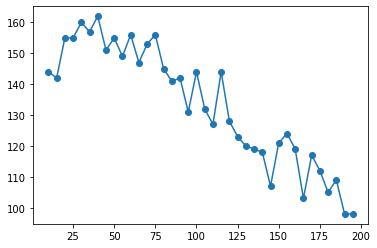

In [24]:
alphas = range(10,200,5)
ress = []
for alpha in alphas:
  res = playgame(probachooser, 1000, alpha)
  ress += [res]
  
import matplotlib.pyplot as plt

plt.scatter(alphas, ress)
plt.plot(alphas, ress)
plt.show()


In [0]:
def probachooser(curitem, b, trainset, trainlabs, alpha):
  if len(trainset) == 0:
    chosenitem = random.randint(curitem,curitem+b-1)
  else:
    clf = MultinomialNB(alpha=alpha)
    clf = clf.fit(trainset, trainlabs)	
    yhat = clf.predict_proba(countsWordByTitle[curitem:(curitem+b)])
    chosenitem = argmax(range(curitem,curitem+b), [p for (c,p) in yhat])
  return(chosenitem)

def playgame(chooser, rounds, alpha):
  curitem = 0
  score = 0
  trainset = []
  trainlabs = []
  b = 5

  while curitem < rounds:
    chosenitem = chooser(curitem, b, trainset, trainlabs, alpha)
    score = score + labs[chosenitem]
    trainset = trainset + [countsWordByTitle[chosenitem]]
    trainlabs = trainlabs + [labs[chosenitem]]
    curitem += b
  return(score)

rep = 10
alphas = [0.00005, 0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0]
ress = []
mins = []
maxs = []
for alpha in alphas:
  total = 0
  res = []
  for i in range(rep):
    res += [playgame(probachooser, 1000, alpha)]
  ress += [sum(res)/rep]
  mins += [min(res)]
  maxs += [max(res)]

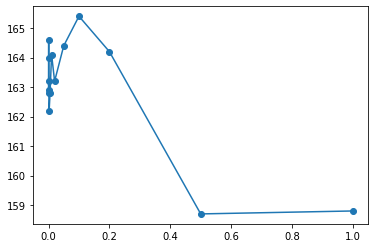

In [28]:
import matplotlib.pyplot as plt

plt.scatter(alphas, ress)
plt.plot(alphas, ress)
# plt.fill_between(alphas, mins, maxs, alpha=0.6)   
plt.show()